In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data exploration(removing unneccessary columns)
df.drop('customerID', axis = 'columns', inplace = True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values# Charges  are in strings. we should convert them into float or int

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()] #rows which have null totalcharges. so we drop them

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<ipython-input-10-e39f7d235675>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes = df1[df.Churn == 'Yes'].tenure
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


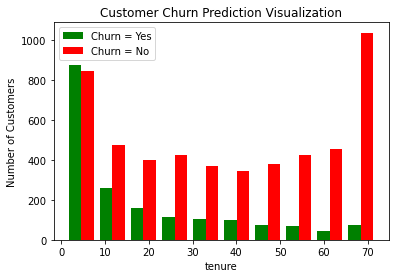

In [10]:
#Visualizing customer who are loyal vs those are not
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no],color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

<ipython-input-11-787887bd22ec>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc_churn_yes = df1[df.Churn == 'Yes'].MonthlyCharges


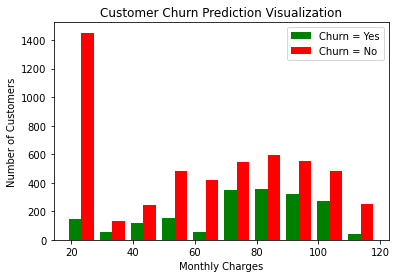

In [11]:
#Visualizing customer who are loyal vs those are not
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes, mc_churn_no],color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [12]:
#printing distinct values in each column
def print_unique_col_vlaues(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column}: {df1[column].unique()}')
print_unique_col_vlaues(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
#Data Cleaning
df1.replace('No internet service','No', inplace = True)
df1.replace('No phone service','No', inplace = True)
print_unique_col_vlaues(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
#Labelling: convert string to some numerical value to understable by NN

In [15]:
#Labelling columns with values :['yes', 'no']
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1 , 'No':0}, inplace = True)
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [18]:
df1['gender'].replace({'Female':1 , 'Male':0}, inplace = True)

In [19]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [20]:
#one hot encoding for more than 2 unique non-integer values
df2 = pd.get_dummies(data= df1, columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
574,1,1,1,0,28,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
751,0,0,1,1,70,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3181,1,0,1,0,64,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1
2252,1,0,1,1,64,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
19,1,0,0,0,21,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [23]:
df2.dtypes#all data types are integer value

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
#scaling values: getting in the range of min and max
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
df2[cols_to_scale].sample(3)

,tenure,MonthlyCharges,TotalCharges
3643,0.732394,0.007960,0.112122
1738,0.915493,0.719403,0.705302
1454,0.394366,0.023881,0.073396


In [29]:
#train and test data

X = df2.drop('Churn', axis = 'columns')
y = df2.Churn


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [32]:
X_train.shape

(5625, 26)

In [33]:
X_test.shape

(1407, 26)

In [42]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
176/176 [==============================] - 1s 1ms/step - loss: 0.5917 - accuracy: 0.6787
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7942
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7993
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7969
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7987
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8073
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8039
Epoch 8/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8054
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7969
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4240 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8123
Epoch 82/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8219
Epoch 83/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8132
Epoch 84/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8196
Epoch 85/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8243
Epoch 86/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8184
Epoch 87/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8228
Epoch 88/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8131
Epoch 89/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8165
Epoch 90/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8211
Epoch 161/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8245
Epoch 162/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8204
Epoch 163/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8189
Epoch 164/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8242
Epoch 165/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8215
Epoch 166/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8348
Epoch 167/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.8123
Epoch 168/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8307
Epoch 169/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3947 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8260
Epoch 240/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8308
Epoch 241/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8271
Epoch 242/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8279
Epoch 243/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8179
Epoch 244/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8207
Epoch 245/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8257
Epoch 246/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8180
Epoch 247/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8324
Epoch 248/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3718 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8302
Epoch 319/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8253
Epoch 320/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8298
Epoch 321/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8212
Epoch 322/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8277
Epoch 323/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8160
Epoch 324/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8241
Epoch 325/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8170
Epoch 326/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8286
Epoch 327/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3742 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8312
Epoch 398/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8194
Epoch 399/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8249
Epoch 400/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8271
Epoch 401/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8281
Epoch 402/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8224
Epoch 403/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8278
Epoch 404/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8287
Epoch 405/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8339
Epoch 406/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3626 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8282
Epoch 477/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8308
Epoch 478/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8235
Epoch 479/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8219
Epoch 480/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8228
Epoch 481/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8339
Epoch 482/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8283
Epoch 483/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8437
Epoch 484/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8253
Epoch 485/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3652 - a

In [43]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7797


[0.47332751750946045, 0.7796730399131775]

In [44]:
y_predict = model.predict(X_test)
y_predict[:5]

array([[0.1800226 ],
       [0.4040518 ],
       [0.01596597],
       [0.7260401 ],
       [0.19168803]], dtype=float32)

In [47]:
#converting y_predicted into 1d array and to 0 or 1

y_pred = []

for each in y_predict:
    if each > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 1, 0]

In [45]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [49]:
#printing classification reprt

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.66      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

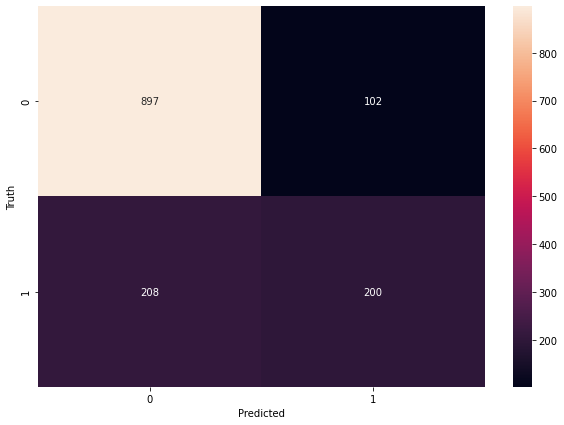

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels= y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print("accuracy:",round((897+200)/(897+200+102+208),2))

accuracy: 0.78


In [56]:
print("Precision for 0 :",round((897)/(897+208),2))

Precision for 0 : 0.81


In [57]:
print("Precision for 1 :",round((200)/(102+200),2))

Precision for 1 : 0.66


In [59]:
print("Recall for 0 :",round((897)/(102+897),3))

Recall for 0 : 0.898


In [60]:
print("Recall for 1 :",round((200)/(200+208),3))

Recall for 1 : 0.49
